In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# file access
import os

# linear algebra
import numpy as np
 
# data processing
import pandas as pd
 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation,BatchNormalization

In [122]:
os.listdir("/content/drive/My Drive/Projects/MNIST")

['MNIST.ipynb', 'mnist_test.csv', 'mnist_train.csv']

In [0]:
TrainData = pd.read_csv("/content/drive/My Drive/Projects/MNIST/mnist_train.csv")
TestData = pd.read_csv("/content/drive/My Drive/Projects/MNIST/mnist_test.csv")

In [0]:
x_train = TrainData.values[:,1:]
y_train = TrainData.values[:,0]
x_test = TestData.values[:,1:]
y_test = TestData.values[:,0]

In [125]:
print(x_train.shape)
print(x_train[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

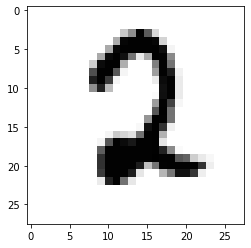

In [126]:
# To view a sample image 
img = x_train[3242]
img = img.reshape((28,28))
img = img/255
plt.imshow(img,cmap='Greys')


In [127]:

#Reshaping to a 4D structure to feed into the Network

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#normalizing the given data by dividing by 255

x_train = x_train /255
x_test = x_test /255

input_shape = x_train.shape
print(input_shape)

(60000, 28, 28, 1)


In [148]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),name='0'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.29))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
0 (Conv2D)                   (None, 28, 28, 16)        160       
_________________________________________________________________
activation_27 (Activation)   (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
1 (Conv2D)                   (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_28 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 14, 14, 32)      

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



In [160]:
model.load_weights('/content/drive/My Drive/Projects/MNIST/model.h5')

history = model.fit(x=x_train,y=y_train,validation_split=0.1, epochs=15)

model.save('/content/drive/My Drive/Projects/MNIST/model.h5')



Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0223 - acc: 0.9927 - val_loss: 0.0332 - val_acc: 0.9938
Epoch 2/15
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0222 - acc: 0.9931 - val_loss: 0.0331 - val_acc: 0.9923
Epoch 3/15
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0195 - acc: 0.9937 - val_loss: 0.0295 - val_acc: 0.9937
Epoch 4/15
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0181 - acc: 0.9938 - val_loss: 0.0314 - val_acc: 0.9927
Epoch 5/15
54000/54000 [==============================] - 63s 1ms/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0304 - val_acc: 0.9935
Epoch 6/15
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0331 - val_acc: 0.9932
Epoch 7/15
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0169 - acc: 0.9949 - val_loss: 0.0356 - val_acc:

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

9


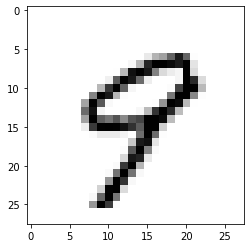

In [169]:
# model = Sequential()
# model.load_weights('/content/drive/My Drive/Projects/MNIST/model.h5')

image_index = 6656
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())



In [163]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

10000/10000 [==============================] - 4s 389us/step
test loss, test acc: [0.043343797034266024, 0.9919]


![image.png](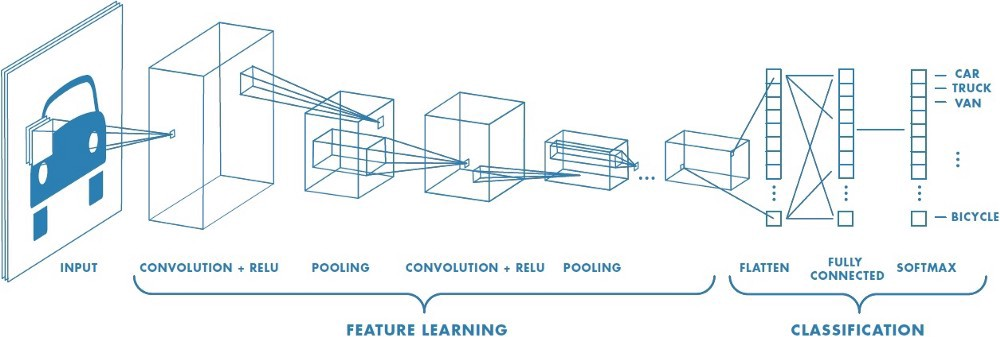TQqVNnSkGpr7trwZJpZQ6xt3leX7lk2R//L5fvOTl05PQwsLCvu2vV0pkVTOpJKeFLLpvxhbtuboBbOLs/wFJ0cMNVK+cMzPa0JC24DGtIlYOo6dTsgWk3X7d2MvUd5Uo1Ag40UUmnDO+9edW1K688OjK6++DxqKPvyoXzOktIQClL8aV77qwpeudNKwIPPldBIDsBHty4bueMDiB5PjUue0udFbFx/dVN5ab3dc3slFY1KJjp3dX1q65YaWhXpSKZlQxyrUIhb107/+or5h86Xjs1PJjatG9617xZA7O7JcX6VRByZrVeuXgek2wqFtPiCLVuJKfKXbVo9tcf+OzxsfHJ5sSSWdNjXqgfWMxNwqqql+ILi5NciuNqj6mNQBuBj0bgwkOPaoOeeJRJOC/y3Qr6FmF41O71qghZcEdoEXnHkHDrhZ7iB+8v/Etcix3uGEc9Q+M9QylHTO73QAoFGmAe/ysqInnw1hHQpCgxeKGVD67OkeniPVCLywqMnmDcHIrmPjhYFJ84UsSqz5OAsPGW8DAtLlQci9UKLTJKUCusqJlasFCK74oUUGzfFxR5rIpY6BZjyKYlwFIcVhTz8NQhaJYiIK1Xa3YwrYzbDz5s/dtqB2fSgpVkipYD54riUJiohT0nRWDoQ3ievz9FCkGrA1B8i/A6WwjvU0/BFCf+vLcebyUAySkOsHWn2AcDAe+oK6QhgGELtCj+2Oa4/+371f6rjcAvQKD1rJ1/XItn8oIDZQsThAvt4nwsPlE8eq0ipqhBXpgXTCUqPm+Fgi886QK5a2glWmbEAYgP+tGySy0L0DqraNlQ7whhFpgrDFrrq5a8a5Gziib3wnWxIIZHIanWJwRAYtfRIhRTAD//lUcvGcP1xGKajRe+sG64E9jqOdLG0apjme1ijFjUzTtXsIjOD6dlyoo/TDFJnDenzmBVDcI/oGjiVi962Z45KGxZca0WYi2gWjafFin+mBfliGegi0tzNPJIaHdYWvvn8AaomYVoFohhpVt8Q7F6U+s9ovDfTl0foP2J+Pf/AwXoMf3SbHunAAAAAElFTkSuQmCC)